## 1.Data Exploration


In [15]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import re
import pandas as pd
import nltk
import csv
import numpy as np
import seaborn as sns
from tqdm import tqdm
tqdm.pandas()
from nltk.corpus import stopwords
pd.set_option('display.max_colwidth', None)
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [16]:
#hadoop_sliding_window.isna().any(axis=1).sum()

In [17]:
def explore_dataset(input_dir,file):
    df= pd.read_csv(input_dir+"/"+file)
    cluster_counts =df.loc[:, df.columns.str.startswith('cluster')]
    labels=df.loc[:,'label']

    plt.figure(figsize=(3, 4), dpi = 110)
    imbalanced_data_plot= sns.countplot(x=labels)
    return cluster_counts,imbalanced_data_plot   

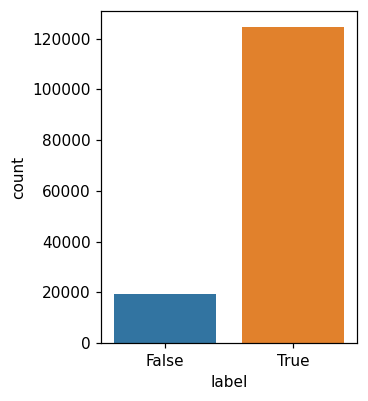

In [18]:
input_dir="output_070323"
file="Hadoop_train_sliding_window.csv"

hadoop_df,plot=explore_dataset(input_dir,file)

## 2.Model Training

In [19]:
def train_test(file_dir,train_file, test_file):
    train= pd.read_csv(file_dir+"/"+train_file)
    test=pd.read_csv(file_dir+"/"+test_file)
    
    X_train= train.filter(regex='^cluster')
    y_train=train.loc[:,'label']
    
    X_test= test.filter(regex='^cluster')
    y_test=test.loc[:,'label']
    return X_train,y_train.values,X_test,y_test.values

In [20]:
def simple_logistic_regression(X_train, y_train, X_test, y_test):
    
    clf = LogisticRegression(random_state=0).fit(X_train, y_train)
    pred=clf.predict(X_test)
    accuracy_score(y_test, pred)
    return pred

In [25]:
file_dir="output_070323"
train_file="Hadoop_train_sliding_window.csv"
test_file="Hadoop_test_sliding_window.csv"
X_train,y_train,X_test,y_test=train_test(file_dir,train_file, test_file)

In [26]:
X_train

,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,...,cluster_240,cluster_241,cluster_242,cluster_243,cluster_244,cluster_245,cluster_246,cluster_247,cluster_248,cluster_249
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143830,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,3,0,0,0
143831,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,3,0,0,0
143832,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,3,0,0,0
143833,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,3,0,0,0


In [22]:
#simple_logistic_regression(X_train, y_train, X_test, y_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# Assume X is your feature matrix and y is the corresponding target variable
X= X_train

# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA
pca = PCA(n_components=5)  # Specify the desired number of components
X_pca = pca.fit_transform(X_scaled)

# Step 3: Fit and transform the data
# X_pca now contains the reduced dimensional representation of your data

# Step 4: Use the transformed data in logistic regression
logreg = LogisticRegression()
logreg.fit(X_pca, y)
